# Caldera

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Extraction

###  Traffic

In [68]:
traffic= pd.read_csv("/Users/asadtariq/Downloads/Traffic.csv")

In [87]:
traffic

,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,protocol,...,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type,label
0,0,fe80::147d:daff:fead:d365,16:7d:da:ad:d3:65,16:7d:da,5353,ff02::fb,33:33:00:00:00:fb,33:33:00,5353,17,...,MDNS,Network,1,1,NaN,NaN,NaN,NaN,NaN,0
1,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,54466,142.250.201.3,00:50:56:ff:cd:57,0:50:56,80,6,...,HTTP,Web,1,1,NaN,NaN,NaN,NaN,NaN,0
2,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,50508,216.58.212.99,00:50:56:ff:cd:57,0:50:56,80,6,...,HTTP,Web,1,1,NaN,NaN,NaN,NaN,NaN,0
3,0,192.168.126.1,16:7d:da:ad:d3:65,16:7d:da,5353,224.0.0.251,01:00:5e:00:00:fb,01:00:5e,5353,17,...,MDNS,Network,1,1,NaN,NaN,NaN,NaN,NaN,0
4,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,42058,142.250.200.194,00:50:56:ff:cd:57,0:50:56,443,6,...,TLS,Web,0,6,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,48120,192.168.126.139,00:0c:29:38:db:a9,00:0c:29,8090,6,...,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN,1
2093,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,58208,192.168.126.139,00:0c:29:38:db:a9,00:0c:29,8172,6,...,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN,1
2094,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,59802,192.168.126.139,00:0c:29:38:db:a9,00:0c:29,27017,6,...,MongoDB,Database,1,1,NaN,NaN,NaN,NaN,NaN,1
2095,1,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,58446,192.168.126.139,00:0c:29:38:db:a9,00:0c:29,8888,6,...,HTTP,Web,0,6,192.168.126.139,NaN,NaN,Go-http-client/1.1,NaN,1


In [88]:
data = traffic[['protocol', 'ip_version', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_duration_ms',
       'src2dst_packets', 'src2dst_bytes', 'dst2src_duration_ms',
       'dst2src_packets', 'dst2src_bytes', 'bidirectional_min_ps',
       'bidirectional_mean_ps', 'bidirectional_stddev_ps',
       'bidirectional_max_ps', 'src2dst_min_ps', 'src2dst_mean_ps',
       'src2dst_stddev_ps', 'src2dst_max_ps', 'dst2src_min_ps',
       'dst2src_mean_ps', 'dst2src_stddev_ps', 'dst2src_max_ps',
       'bidirectional_min_piat_ms', 'bidirectional_mean_piat_ms',
       'bidirectional_stddev_piat_ms', 'bidirectional_max_piat_ms',
       'src2dst_min_piat_ms', 'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms',
       'src2dst_max_piat_ms', 'dst2src_min_piat_ms', 'dst2src_mean_piat_ms',
       'dst2src_stddev_piat_ms', 'dst2src_max_piat_ms',
       'bidirectional_syn_packets', 'bidirectional_cwr_packets',
       'bidirectional_ece_packets', 'bidirectional_urg_packets',
       'bidirectional_ack_packets', 'bidirectional_psh_packets',
       'bidirectional_rst_packets', 'bidirectional_fin_packets',
       'src2dst_syn_packets', 'src2dst_cwr_packets', 'src2dst_ece_packets',
       'src2dst_urg_packets', 'src2dst_ack_packets', 'src2dst_psh_packets',
       'src2dst_rst_packets', 'src2dst_fin_packets', 'dst2src_syn_packets',
       'dst2src_cwr_packets', 'dst2src_ece_packets', 'dst2src_urg_packets',
       'dst2src_ack_packets', 'dst2src_psh_packets', 'dst2src_rst_packets',
       'dst2src_fin_packets', 'application_name', 'application_category_name',
       'application_is_guessed', 'application_confidence',
       'requested_server_name', 'user_agent', 'content_type', 'label']]


data 

,protocol,ip_version,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_duration_ms,src2dst_packets,src2dst_bytes,dst2src_duration_ms,dst2src_packets,...,dst2src_rst_packets,dst2src_fin_packets,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,user_agent,content_type,label
0,17,6,0,1,483,0,1,483,0,0,...,0,0,MDNS,Network,1,1,NaN,NaN,NaN,0
1,6,4,70870,18,1026,70870,9,486,70869,9,...,0,1,HTTP,Web,1,1,NaN,NaN,NaN,0
2,6,4,84184,22,1254,84184,11,594,84183,11,...,0,1,HTTP,Web,1,1,NaN,NaN,NaN,0
3,17,4,0,1,463,0,1,463,0,0,...,0,0,MDNS,Network,1,1,NaN,NaN,NaN,0
4,6,4,111963,16,1119,111963,8,573,111962,8,...,0,1,TLS,Web,0,6,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,6,4,1,2,134,0,1,74,0,1,...,1,0,Unknown,Unspecified,0,0,NaN,NaN,NaN,1
2093,6,4,0,2,134,0,1,74,0,1,...,1,0,Unknown,Unspecified,0,0,NaN,NaN,NaN,1
2094,6,4,1,2,134,0,1,74,0,1,...,1,0,MongoDB,Database,1,1,NaN,NaN,NaN,1
2095,6,4,1793748,256,63435,1793748,126,40733,1793747,130,...,0,0,HTTP,Web,0,6,192.168.126.139,Go-http-client/1.1,NaN,1


# Feature Selection

### dropping features with more than 80% null values

In [89]:
data.isna().sum()

protocol                        0
ip_version                      0
bidirectional_duration_ms       0
bidirectional_packets           0
bidirectional_bytes             0
                             ... 
application_confidence          0
requested_server_name         396
user_agent                   2034
content_type                 2058
label                           0
Length: 67, dtype: int64

In [90]:
limitPer = len(data) * .80
yourdf = data.dropna(thresh=limitPer, axis=1)


In [91]:
yourdf.isna().sum()

protocol                       0
ip_version                     0
bidirectional_duration_ms      0
bidirectional_packets          0
bidirectional_bytes            0
                            ... 
application_category_name      0
application_is_guessed         0
application_confidence         0
requested_server_name        396
label                          0
Length: 65, dtype: int64

In [92]:
null_counts = yourdf.isnull().sum()
null_counts[null_counts > 0]

requested_server_name    396
dtype: int64

# Data Preprocessing

In [93]:
list(yourdf.select_dtypes(['object']).columns)


['application_name', 'application_category_name', 'requested_server_name']

### Replacing null values of Numeric Features with mean and Object features with Mode.

In [94]:
# Loop through each column in the dataframe
for col in yourdf.columns:
    # Check if column contains numeric values
    if np.issubdtype(yourdf[col].dtype, np.number):
        # Replace null values with mean of column
        yourdf[col].fillna(yourdf[col].mean(), inplace=True)
    else:
        # Replace null values with mode of column
        yourdf[col].fillna(yourdf[col].mode()[0], inplace=True)

/var/folders/dk/9q84mn0j1nzfg85t9zx5d1480000gn/T/ipykernel_19289/1293574417.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yourdf[col].fillna(yourdf[col].mean(), inplace=True)
/var/folders/dk/9q84mn0j1nzfg85t9zx5d1480000gn/T/ipykernel_19289/1293574417.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yourdf[col].fillna(yourdf[col].mode()[0], inplace=True)
/var/folders/dk/9q84mn0j1nzfg85t9zx5d1480000gn/T/ipykernel_19289/1293574417.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [95]:
yourdf

,protocol,ip_version,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_duration_ms,src2dst_packets,src2dst_bytes,dst2src_duration_ms,dst2src_packets,...,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,label
0,17,6,0,1,483,0,1,483,0,0,...,0,0,0,0,MDNS,Network,1,1,i.ytimg.com,0
1,6,4,70870,18,1026,70870,9,486,70869,9,...,9,1,0,1,HTTP,Web,1,1,i.ytimg.com,0
2,6,4,84184,22,1254,84184,11,594,84183,11,...,11,1,0,1,HTTP,Web,1,1,i.ytimg.com,0
3,17,4,0,1,463,0,1,463,0,0,...,0,0,0,0,MDNS,Network,1,1,i.ytimg.com,0
4,6,4,111963,16,1119,111963,8,573,111962,8,...,8,3,0,1,TLS,Web,0,6,i.ytimg.com,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,6,4,1,2,134,0,1,74,0,1,...,1,0,1,0,Unknown,Unspecified,0,0,i.ytimg.com,1
2093,6,4,0,2,134,0,1,74,0,1,...,1,0,1,0,Unknown,Unspecified,0,0,i.ytimg.com,1
2094,6,4,1,2,134,0,1,74,0,1,...,1,0,1,0,MongoDB,Database,1,1,i.ytimg.com,1
2095,6,4,1793748,256,63435,1793748,126,40733,1793747,130,...,130,90,0,0,HTTP,Web,0,6,192.168.126.139,1


### encoding Object features as categorical numerical features

In [96]:
for col in yourdf.columns:
    # Check if column contains object values
    if yourdf[col].dtype == 'object':
        # Factorize the column
        yourdf[col] = pd.factorize(yourdf[col])[0]


/var/folders/dk/9q84mn0j1nzfg85t9zx5d1480000gn/T/ipykernel_19289/606315440.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yourdf[col] = pd.factorize(yourdf[col])[0]


In [97]:
data = yourdf

In [98]:
data

,protocol,ip_version,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_duration_ms,src2dst_packets,src2dst_bytes,dst2src_duration_ms,dst2src_packets,...,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,label
0,17,6,0,1,483,0,1,483,0,0,...,0,0,0,0,0,0,1,1,0,0
1,6,4,70870,18,1026,70870,9,486,70869,9,...,9,1,0,1,1,1,1,1,0,0
2,6,4,84184,22,1254,84184,11,594,84183,11,...,11,1,0,1,1,1,1,1,0,0
3,17,4,0,1,463,0,1,463,0,0,...,0,0,0,0,0,0,1,1,0,0
4,6,4,111963,16,1119,111963,8,573,111962,8,...,8,3,0,1,2,1,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,6,4,1,2,134,0,1,74,0,1,...,1,0,1,0,16,5,0,0,0,1
2093,6,4,0,2,134,0,1,74,0,1,...,1,0,1,0,16,5,0,0,0,1
2094,6,4,1,2,134,0,1,74,0,1,...,1,0,1,0,42,10,1,1,0,1
2095,6,4,1793748,256,63435,1793748,126,40733,1793747,130,...,130,90,0,0,1,1,0,6,189,1


In [99]:
X = data.drop("label", axis=1)
y = data["label"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,shuffle=True)

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest_classifier = RandomForestClassifier(n_estimators=1, random_state=42)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1, random_state=42)

In [101]:
y_pred = random_forest_classifier.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with 100 decision-trees : 99.5232


# Metrics Evaluation

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, random_forest_classifier.predict_proba(X_test)[:, 1])
kappa = cohen_kappa_score(y_test, y_pred)

print("Accuracy score:", acc *100)
print("Precision score:", prec*100)
print("Recall score:", rec*100)
print("F1 score:", f1*100)
print("AUC-ROC score:", auc_roc*100)
print("Cohen's kappa score:", kappa*100)

Accuracy score: 99.52324195470798
Precision score: 93.54838709677419
Recall score: 93.54838709677419
F1 score: 93.54838709677419
AUC-ROC score: 96.65043117214948
Cohen's kappa score: 93.30086234429895


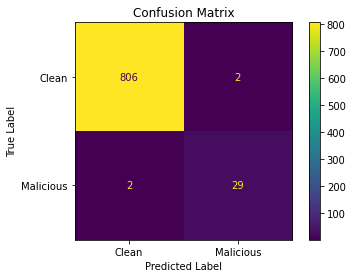

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# assuming you have your true labels and predicted labels

custom_labels = ['Clean', 'Malicious']
# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=custom_labels)

# plot confusion matrix
disp.plot()

# add title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()



The classifier has 99% percent accuracy on the test set, where out of 839 cases, 835 are classified correctly (806 Clean and 29 Malicious) and only 4 are classified incorrectly, i.e. 2 each for each label.